### Import Libraries

In [1]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### import dataset

In [2]:
data =pd.read_csv('/kaggle/input/predict-potential-spammers-on-fiverr/train.csv')

In [3]:
data.head()

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0,1,20972,14,13,3,11,1,2,15,...,0,0,0,0,0,0,0,0,1,0
1,0,2,7362,213,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
2,0,3,21216,215,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2261,212,71,2,8,1,2,15,...,0,0,0,0,0,0,0,1,0,0
4,0,5,4543,213,71,2,8,1,2,15,...,0,0,0,0,0,0,0,0,0,0


### exploratory data Analysis

In [4]:
# label indicate 
# 1 spammer 
# 0 not spammer 

print('unique value in label', data['label'].unique())
print('---'*20)
print('')

print('number of each value in label \n' ,data['label'].value_counts()  )
print('---'*20)

unique value in label [0 1]
------------------------------------------------------------

number of each value in label 
 0    446477
1     12321
Name: label, dtype: int64
------------------------------------------------------------


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458798 entries, 0 to 458797
Data columns (total 53 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   label    458798 non-null  int64  
 1   user_id  458798 non-null  int64  
 2   X1       458798 non-null  int64  
 3   X2       458798 non-null  int64  
 4   X3       458798 non-null  int64  
 5   X4       458798 non-null  int64  
 6   X5       458798 non-null  int64  
 7   X6       458798 non-null  int64  
 8   X7       458798 non-null  int64  
 9   X8       458798 non-null  int64  
 10  X9       458798 non-null  int64  
 11  X10      458798 non-null  int64  
 12  X11      458798 non-null  int64  
 13  X12      458798 non-null  int64  
 14  X13      458792 non-null  float64
 15  X14      458798 non-null  int64  
 16  X15      458798 non-null  int64  
 17  X16      458798 non-null  int64  
 18  X17      458798 non-null  int64  
 19  X18      458798 non-null  int64  
 20  X19      458798 non-null  

In [6]:
# X13 is only column having float value
data['X13']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
458793    0.0
458794    0.0
458795    0.0
458796    0.0
458797    0.0
Name: X13, Length: 458798, dtype: float64

In [7]:
data.describe()

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
count,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,...,458798.000000,458798.000000,458798.000000,458798.000000,458798.0,458798.0,458798.0,458798.000000,458798.000000,458798.000000
mean,0.026855,241363.771411,10850.591243,154.947696,28.107965,2.407831,10.985176,3.215446,5.082675,15.654039,...,0.519900,0.041033,0.074793,0.008123,0.0,0.0,0.0,0.299703,0.512291,0.000072
std,0.161660,139440.017203,7078.656632,67.952267,19.227303,0.800163,5.527487,0.811902,3.302548,4.993260,...,1.557607,0.253398,0.432161,0.089763,0.0,0.0,0.0,0.458128,0.499849,0.008481
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,120595.250000,4692.000000,95.000000,13.000000,2.000000,8.000000,3.000000,2.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,241234.500000,11574.000000,189.000000,14.000000,3.000000,11.000000,3.000000,5.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000
75%,0.000000,362157.750000,16425.000000,213.000000,37.000000,3.000000,16.000000,4.000000,8.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000
max,1.000000,482935.000000,24234.000000,222.000000,94.000000,3.000000,17.000000,4.000000,11.000000,29.000000,...,97.000000,33.000000,56.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [8]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
label,458798.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
user_id,458798.0,241364.0,139440.0,1.0,120595.0,241234.0,362158.0,482935.0
X1,458798.0,10851.0,7079.0,1.0,4692.0,11574.0,16425.0,24234.0
X2,458798.0,155.0,68.0,1.0,95.0,189.0,213.0,222.0
X3,458798.0,28.0,19.0,1.0,13.0,14.0,37.0,94.0
X4,458798.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0
X5,458798.0,11.0,6.0,1.0,8.0,11.0,16.0,17.0
X6,458798.0,3.0,1.0,1.0,3.0,3.0,4.0,4.0
X7,458798.0,5.0,3.0,1.0,2.0,5.0,8.0,11.0
X8,458798.0,16.0,5.0,1.0,14.0,15.0,21.0,29.0


In [9]:
data.shape

(458798, 53)

### we find the relationship between 
label and user id 

label and other parameters 

Text(0, 0.5, 'User_id')

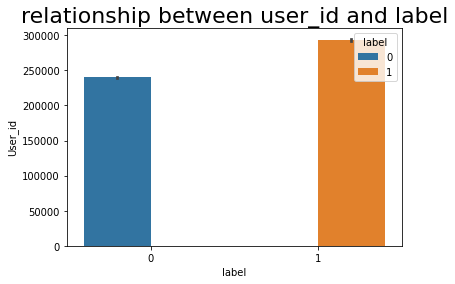

In [10]:
sns.barplot(data['label'] , data['user_id'] ,hue=data['label'] )  
plt.title('relationship between user_id and label' , size=22)
plt.xlabel('label')
plt.ylabel('User_id')




Text(0.5, 1.0, 'relationship between other parameter and label')

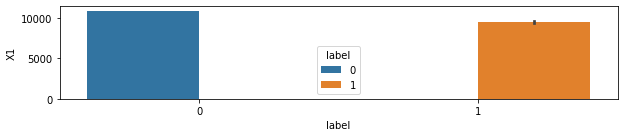

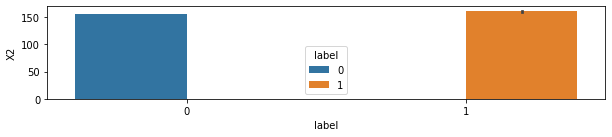

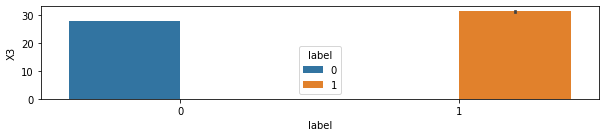

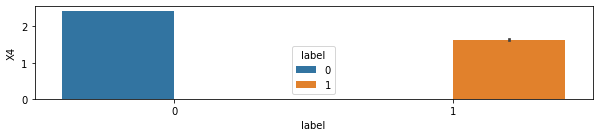

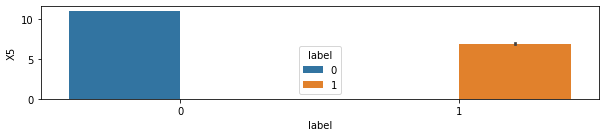

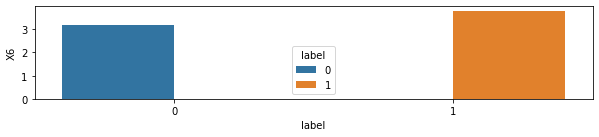

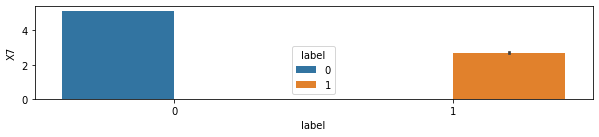

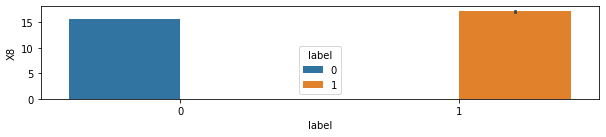

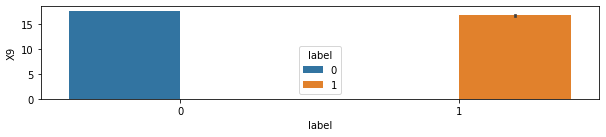

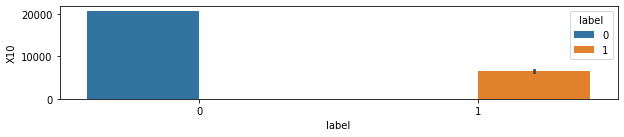

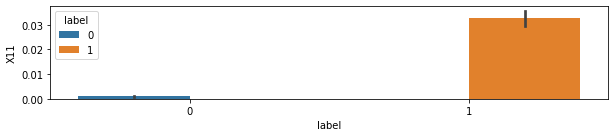

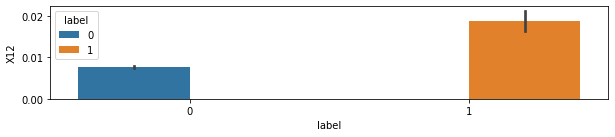

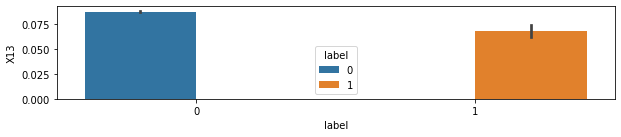

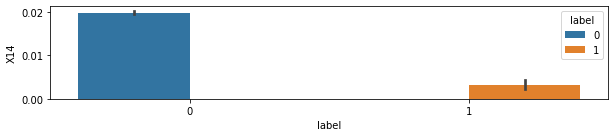

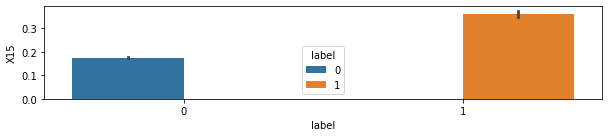

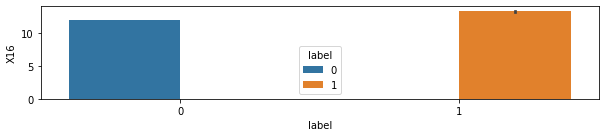

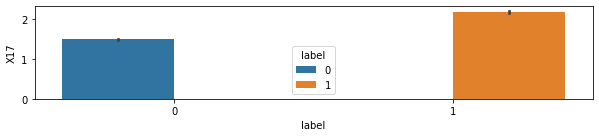

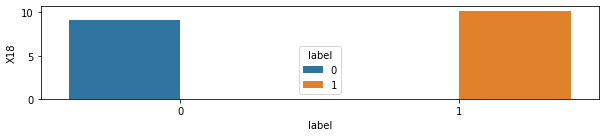

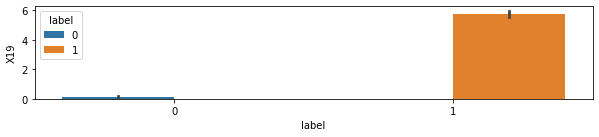

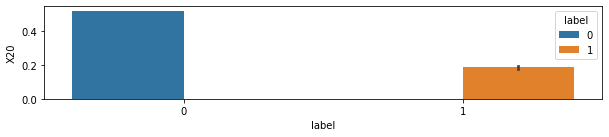

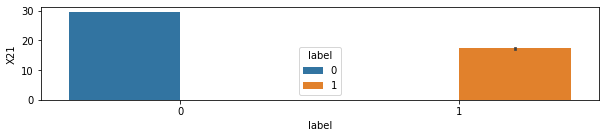

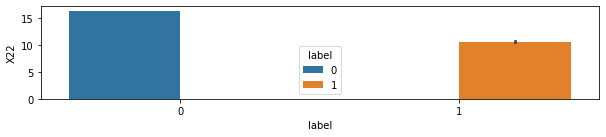

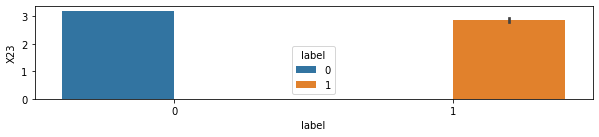

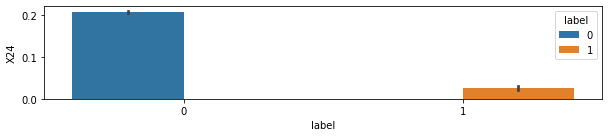

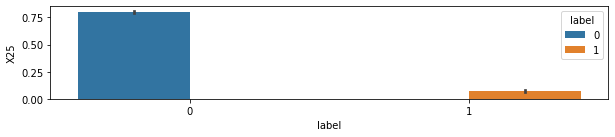

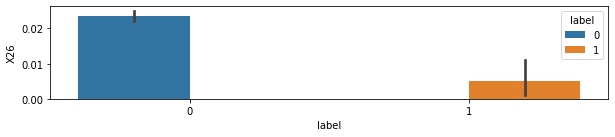

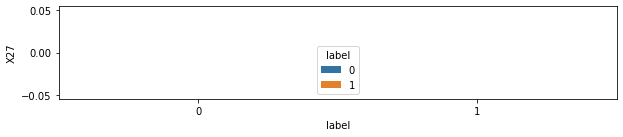

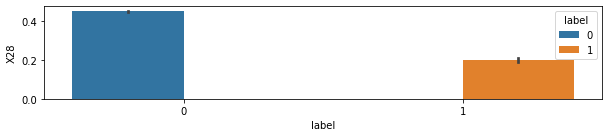

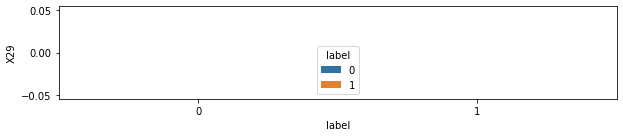

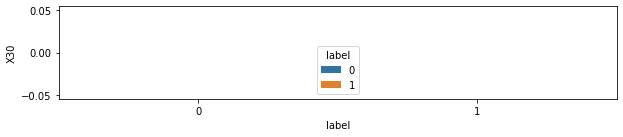

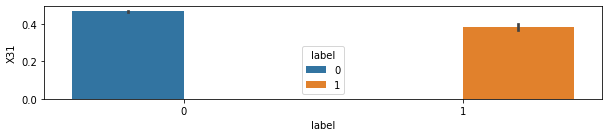

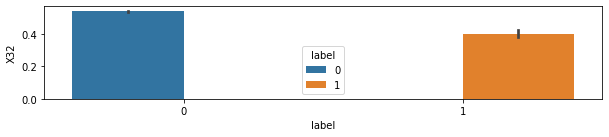

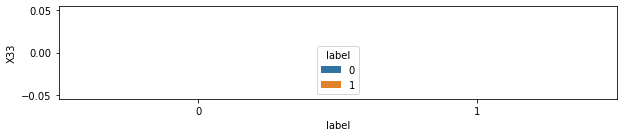

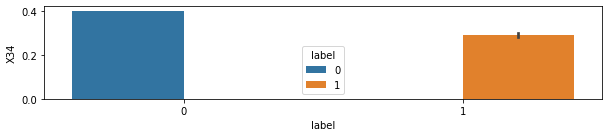

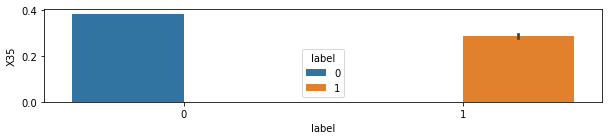

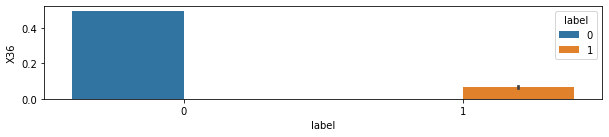

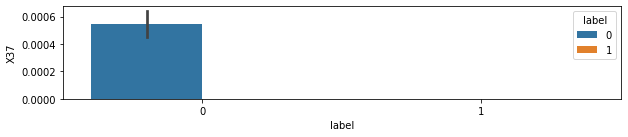

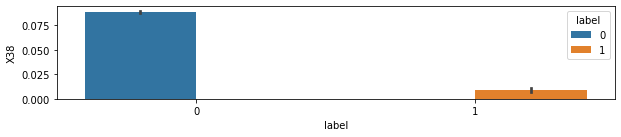

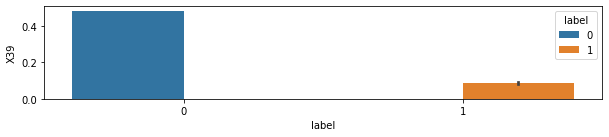

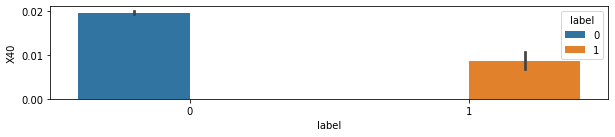

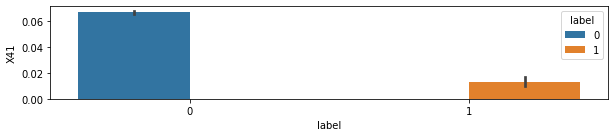

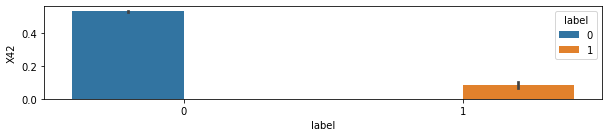

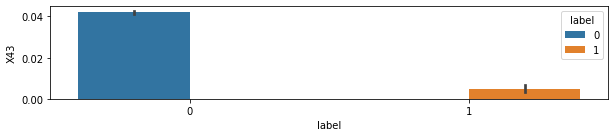

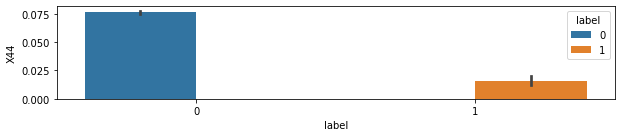

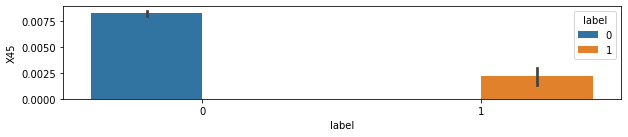

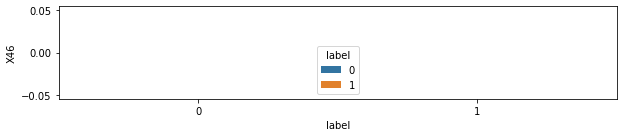

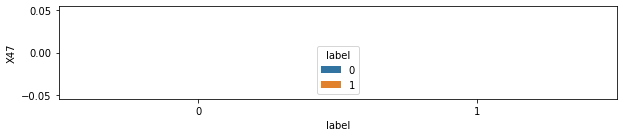

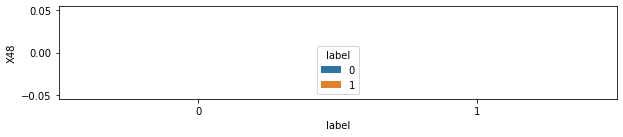

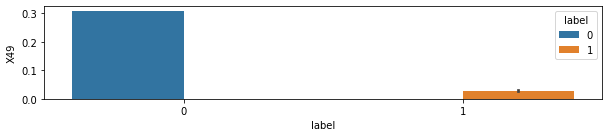

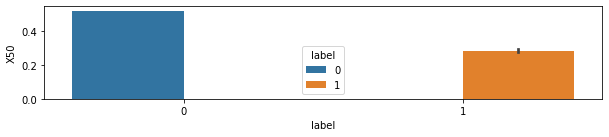

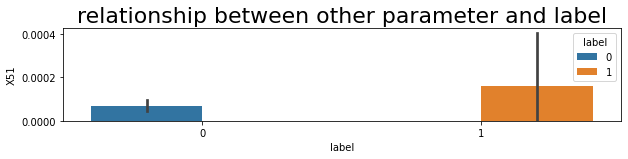

In [11]:
for i ,var in enumerate(data.iloc[:,2:]):
    plt.figure(figsize=(10, 110))
    plt.subplot(54,1,i+1)
    
    
    sns.barplot(data['label'] , data[var] ,hue=data['label'] )  
plt.title('relationship between other parameter and label' , size=22)
    
        


### drop value
we will drop these columns

'X27','X29', 'X30', 'X33', 'X46', 'X47', 'X48 '


In [12]:
data.isnull().sum()

label      0
user_id    0
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        6
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X33        0
X34        0
X35        0
X36        0
X37        0
X38        0
X39        0
X40        0
X41        0
X42        0
X43        0
X44        0
X45        0
X46        0
X47        0
X48        0
X49        0
X50        0
X51        0
dtype: int64

<AxesSubplot:>

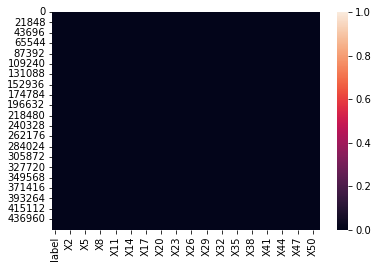

In [13]:
# before Missing value
sns.heatmap(data.isnull())

#### handle missing value

In [14]:
print('mode of X13 =' ,data['X13'].mode()[0])


mode of X13 = 0.0


In [15]:
data['X13']=data['X13'].fillna(data['X13'].mode()[0])

<AxesSubplot:>

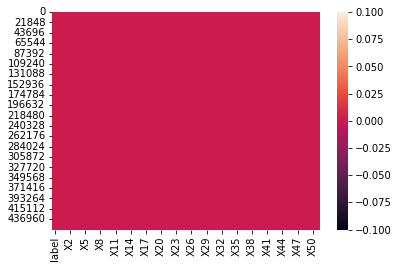

In [16]:
sns.heatmap(data.isnull())

<AxesSubplot:>

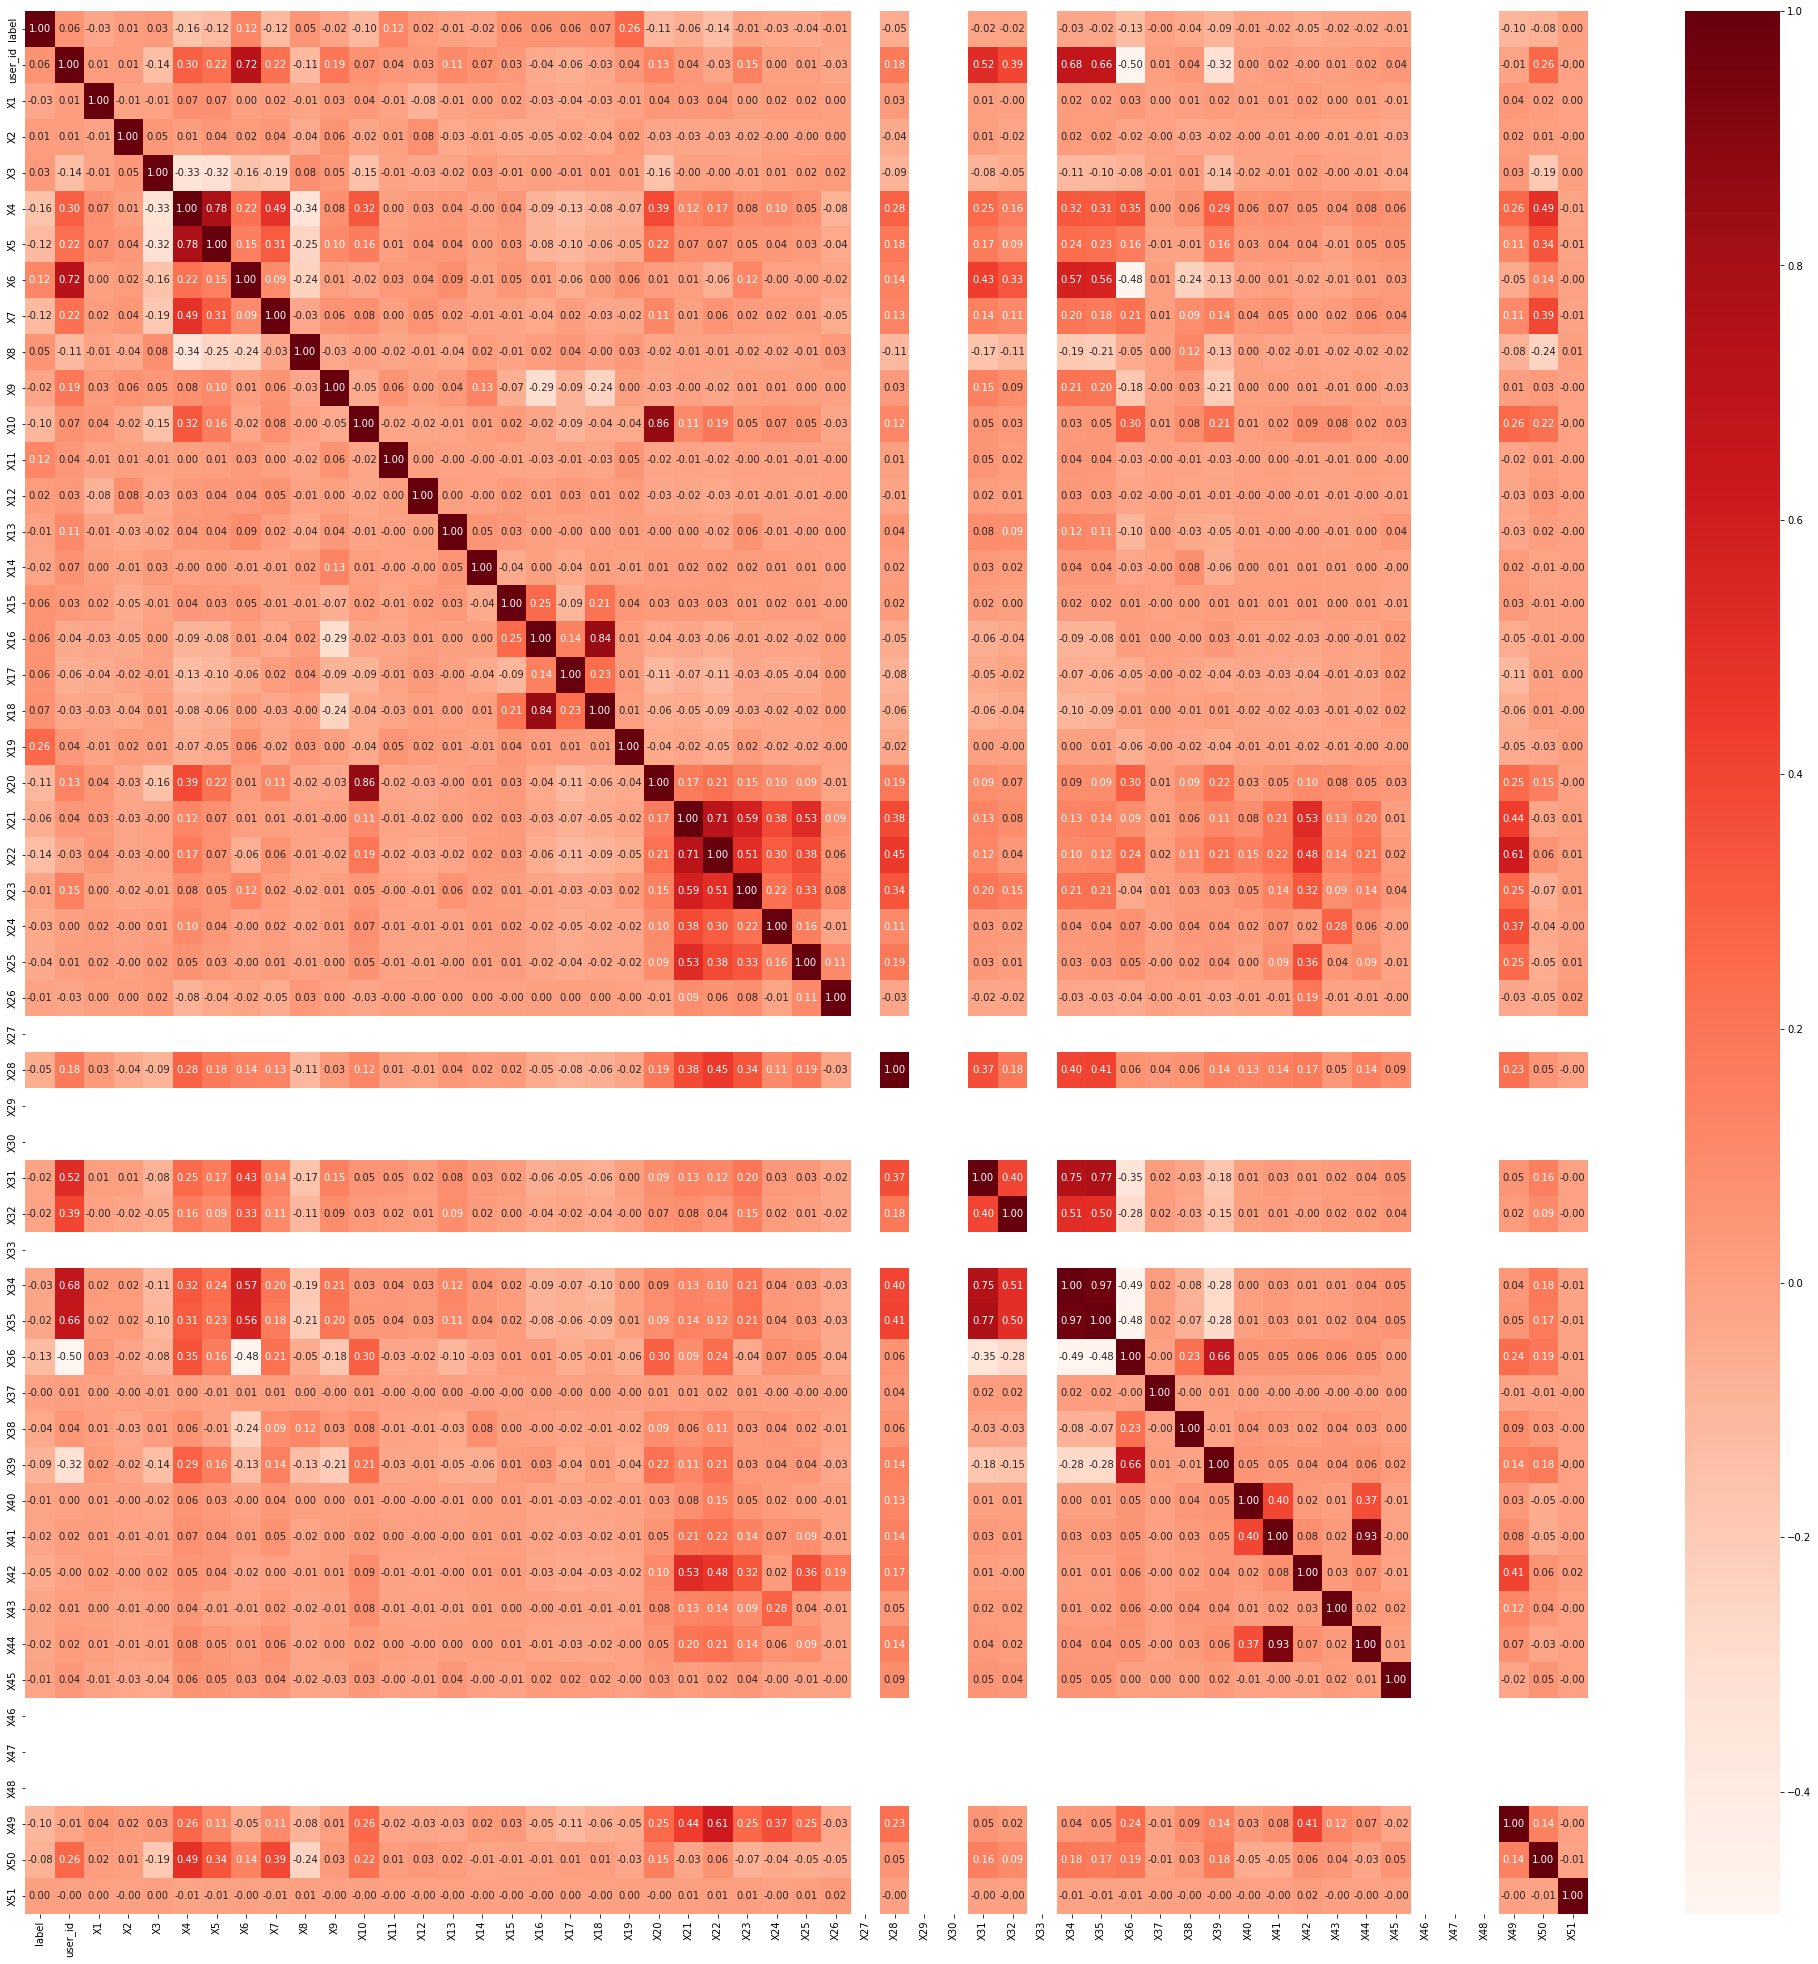

In [17]:
plt.figure(figsize=(35,35))
sns.heatmap(data.corr() , annot=True,cmap=plt.cm.Reds, fmt='.2f')

In [18]:
data.drop(columns=['X27','X29', 'X30', 'X33', 'X46', 'X47', 'X48'], inplace=True)


### Correlation graph

<AxesSubplot:>

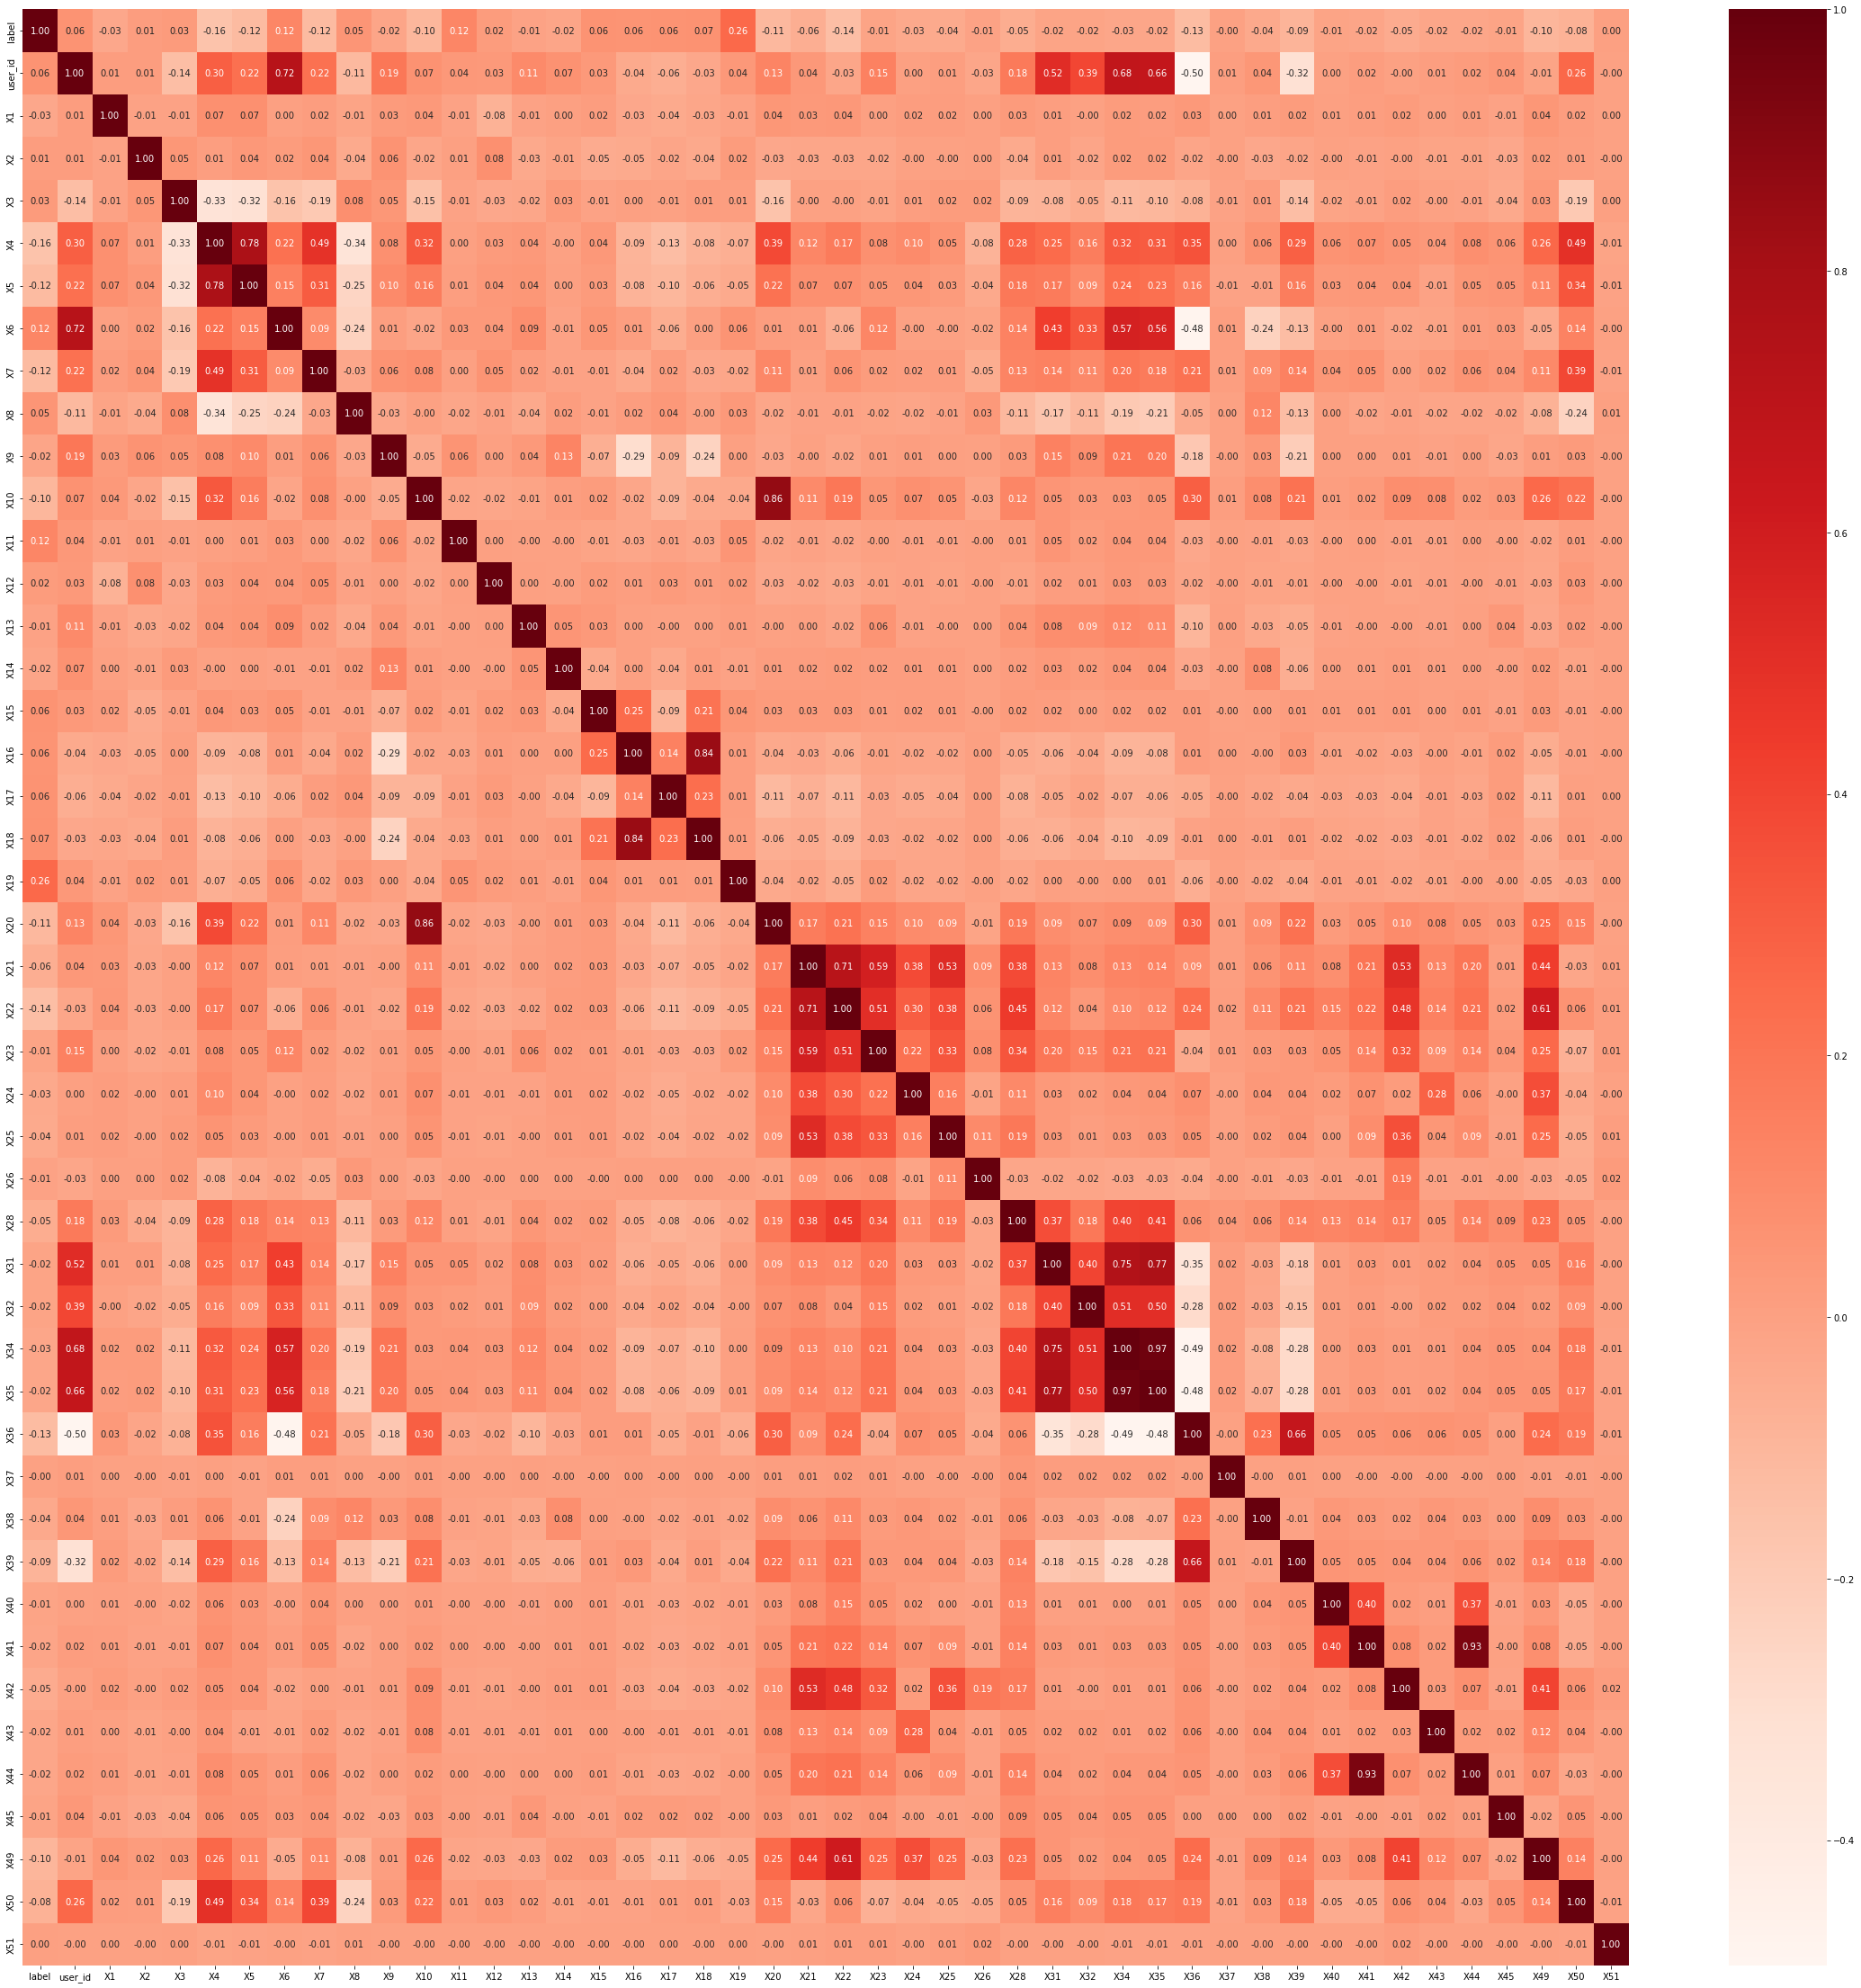

In [19]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr() , annot=True,cmap=plt.cm.Reds, fmt='.2f')

 1 shows the strong relationshiop
    
 0 shows no relatopnship

-1 shows negative relationship

    

In [20]:
print(' unique values \n total number of unique value ')
for i in data:
    print(i, 'unique value')
    print(data[i].unique())
    print(data[i].value_counts)
    print('')
    print('')


 unique values 
 total number of unique value 
label unique value
[0 1]
<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
458793    0
458794    0
458795    0
458796    0
458797    0
Name: label, Length: 458798, dtype: int64>


user_id unique value
[     1      2      3 ... 482933 482934 482935]
<bound method IndexOpsMixin.value_counts of 0              1
1              2
2              3
3              4
4              5
           ...  
458793    482931
458794    482932
458795    482933
458796    482934
458797    482935
Name: user_id, Length: 458798, dtype: int64>


X1 unique value
[20972  7362 21216 ...  6069  5197  4354]
<bound method IndexOpsMixin.value_counts of 0         20972
1          7362
2         21216
3          2261
4          4543
          ...  
458793        1
458794     6139
458795     1164
458796      187
458797    19901
Name: X1, Length: 458798, dtype: int64>


X2 unique value
[ 14 213 215 212 211  46

In [21]:
# X 13 is a float value or contain a lot of zero value 
# so float value cannot be trained if the have lot of 0 value 
# we have 2 method to tackle with 
# drop value 
# change data type 


In [22]:
data1= data.drop(columns='X13' , axis=1)

### split data

In [23]:
x = data1.iloc[:,1:]
y=data1.iloc[:,:1]

In [24]:
x.head()

,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X39,X40,X41,X42,X43,X44,X45,X49,X50,X51
0,1,20972,14,13,3,11,1,2,15,26,...,0,0,0,0,0,0,0,0,1,0
1,2,7362,213,71,3,11,1,2,15,26,...,0,0,0,0,0,0,0,0,0,0
2,3,21216,215,71,3,11,1,2,15,14,...,0,0,0,0,0,0,0,0,0,0
3,4,2261,212,71,2,8,1,2,15,14,...,0,0,0,0,0,0,0,1,0,0
4,5,4543,213,71,2,8,1,2,15,14,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [26]:
print('shape of total data set  =', data.shape)
print('Shape of x data set  =', x.shape)
print('Shape of y data set  =', y.shape)

shape of total data set  = (458798, 46)
Shape of x data set  = (458798, 44)
Shape of y data set  = (458798, 1)


## Test train data

In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y ,test_size=0.2 , random_state=0)

In [28]:
print('shape of x_train =' , x_train.shape)
print('shape of x_test =' , x_test.shape)
print('shape of y_train =' , y_train.shape)
print('shape of y_test =' , y_test.shape)

shape of x_train = (367038, 44)
shape of x_test = (91760, 44)
shape of y_train = (367038, 1)
shape of y_test = (91760, 1)


## Model, predict and solve


Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (spam order  or not)

KNN or k-Nearest Neighbors

Support Vector Machines

Naive Bayes classifier

Decision Tree


### k-Nearest Neighbors

k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=11).fit(x_train,y_train)

In [30]:
model

KNeighborsClassifier(n_neighbors=11)

In [31]:
kn_pred=model.predict(x_test)

### Error/Score

In [32]:
from sklearn import metrics

In [33]:
metrics.accuracy_score(y_test,kn_pred)

0.9722319093286835

In [34]:
# Our(KNN) accuracy score is 97.22% percent, which is extra-ordinary 

### Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

### Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

### f1-score


f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

### Support

Support is the actual number of occurrences of the class in our dataset.



In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     89297
           1       0.45      0.15      0.22      2463

    accuracy                           0.97     91760
   macro avg       0.71      0.57      0.60     91760
weighted avg       0.96      0.97      0.97     91760



In [36]:
# precision rate , recall , f1-score are high means customer are not spammer 

# precision rate , recall , f1-score are lower means customer are spammer

## confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

### True Positives
True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

### True Negatives
True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

### False Positives (Type I error)
False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

### False Negatives (Type II error)
False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [37]:
from sklearn.metrics import plot_confusion_matrix
cm = metrics.confusion_matrix(y_test , kn_pred)
cm

array([[88847,   450],
       [ 2098,   365]])

In [38]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  88847

True Negatives(TN) =  365

False Positives(FP) =  450

False Negatives(FN) =  2098


In [39]:
knn_score = metrics.accuracy_score(y_test, kn_pred)
print('accutracy score is =', knn_score * 100,'%' )

accutracy score is = 97.22319093286835 %


Text(0.5, 1.0, 'KNN model accuracy : 97.22319093286835% ')

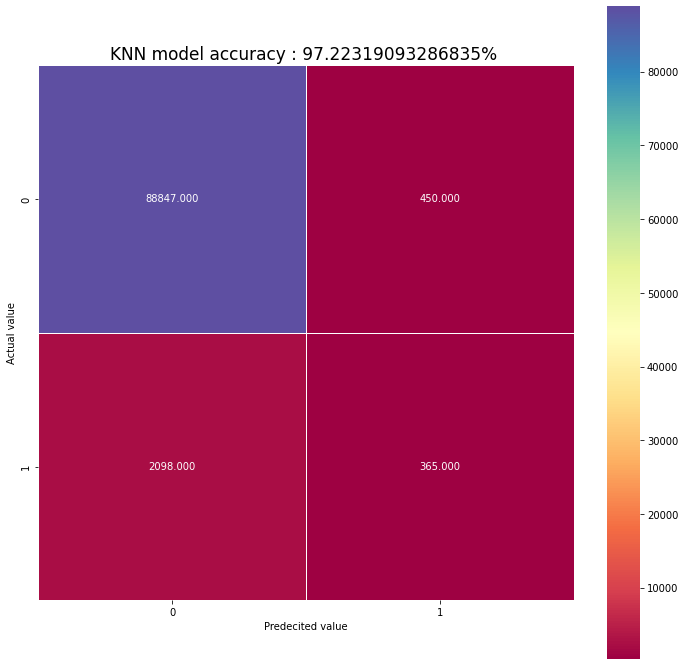

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(cm ,annot=True, fmt='.3f' , linewidths=.5 ,square=True , cmap='Spectral' )
plt.ylabel('Actual value')
plt.xlabel('Predecited value')
all_sample_title ='KNN model accuracy : {0}% '.format( knn_score * 100)
plt.title(all_sample_title, size  =17)

# how to read confusion matrix

True positive (88847)  this result shows that actual value(no spammer ) and predicted value (no spammer)-----True prediction

True negative (365)  this result shows that the actual value (spamer) and predicted value (spammer)-------True prediction

False positive (450)  this result shows that the actual value (spammer) and predicted value (no spammer)----Type-1 error

False negative (2098)  this result shows that the actual value (no spammer) and predicted value (spammer)----Type-2 error

## Decision Tree

decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia.

In [41]:
from sklearn.tree import DecisionTreeClassifier  


In [42]:
dt_model=DecisionTreeClassifier().fit(x_train,y_train)
dt_model

DecisionTreeClassifier()

In [43]:
dt_pred= dt_model.predict(x_test)

### Error/Score

In [44]:
from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_test,dt_pred)
dt_score

0.9744659982563209

In [45]:
# Our(decision Tree) accuracy score is 97.45% percent, which is extra-ordinary 

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     89297
           1       0.52      0.56      0.54      2463

    accuracy                           0.97     91760
   macro avg       0.76      0.77      0.76     91760
weighted avg       0.98      0.97      0.97     91760



In [47]:
from sklearn.metrics import plot_confusion_matrix
cm = metrics.confusion_matrix(y_test , dt_pred)
cm

array([[88030,  1267],
       [ 1076,  1387]])

In [48]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  88030

True Negatives(TN) =  1387

False Positives(FP) =  1267

False Negatives(FN) =  1076


In [49]:
score = metrics.accuracy_score(y_test, dt_pred)
print('accutracy score is =', score * 100,'%' )

accutracy score is = 97.44659982563209 %


Text(0.5, 1.0, 'Decision tree model accuracy : 97.44659982563209% ')

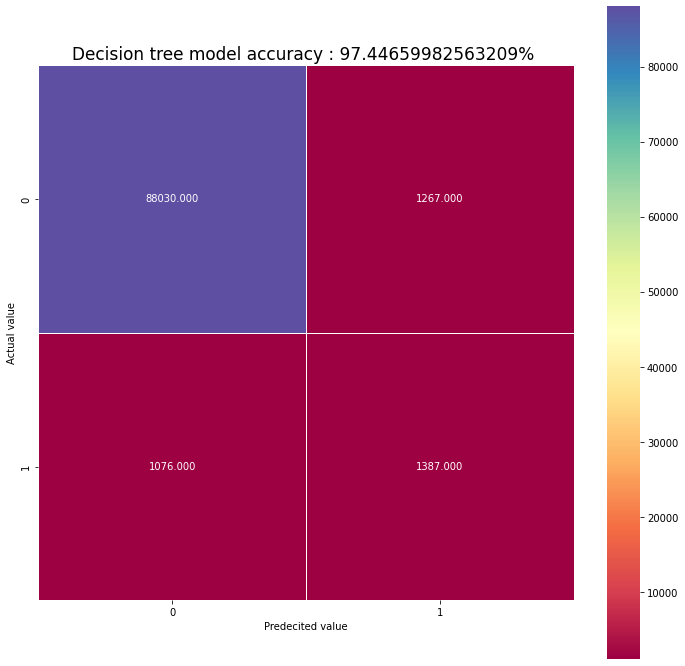

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(cm ,annot=True, fmt='.3f' , linewidths=.5 ,square=True , cmap='Spectral' )
plt.ylabel('Actual value')
plt.xlabel('Predecited value')
all_sample_title ='Decision tree model accuracy : {0}% '.format( score * 100)
plt.title(all_sample_title, size  =17)

### how to read confusion matrix

True positive (88020)  this result shows that actual value(no spammer ) and predicted value (no spammer)-----True prediction

True negative (1403)  this result shows that the actual value (spamer) and predicted value (spammer)-------True prediction

False positive (1277)  this result shows that the actual value (spammer) and predicted value (no spammer)----Type-1 error

False negative (1060)  this result shows that the actual value (no spammer) and predicted value (spammer)----Type-2 error

## Support vector machine

Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.

In [51]:
from sklearn.svm import SVC


svm_model = SVC().fit(x_train,y_train)




In [52]:
svm_pred= svm_model.predict(x_test)
svm_pred

array([0, 0, 0, ..., 0, 0, 0])

### Error/Score

In [53]:
from sklearn.metrics import accuracy_score
svm_score = accuracy_score(y_test , svm_pred)
print('Accuracy score =' , svm_score)

Accuracy score = 0.9731582388840453


In [54]:
# Our(Support Vector Machine) accuracy score is 97.31% percent, which is extra-ordinary 

In [55]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , svm_pred)
cm

array([[89297,     0],
       [ 2463,     0]])

In [56]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  89297

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  2463


SVM model accuray ( in %) :97.31582388840452


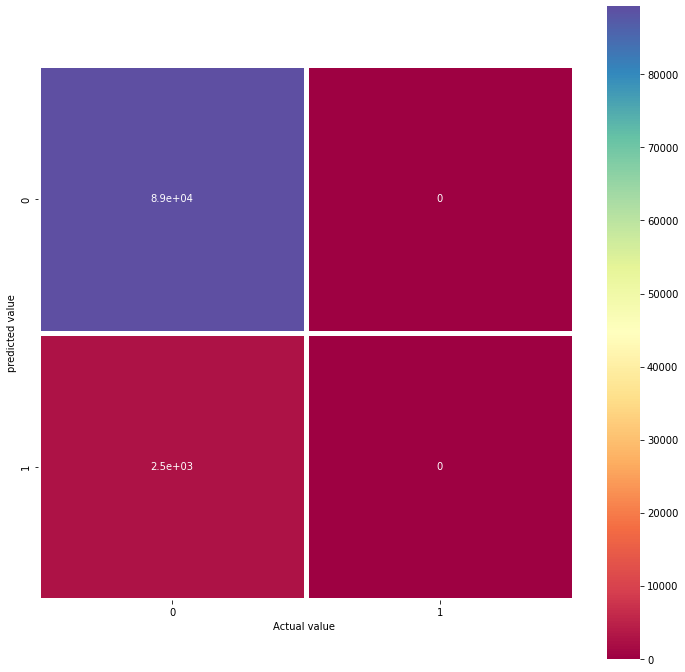

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(cm , annot=True , linewidths=5 , square=True,cmap='Spectral')
plt.xlabel('Actual value ')
plt.ylabel('predicted value')
all_sample_title = 'SVM model accuray ( in %) :{0}'.format(svm_score*100)
print(all_sample_title)
plt.show()

 True positive (89297) this result shows that actual value(no spammer ) and predicted value (no spammer)-----True prediction

True negative (0) this result shows that the actual value (spamer) and predicted value (spammer)-------True prediction

False positive (0) this result shows that the actual value (spammer) and predicted value (no spammer)----Type-1 error

False negative (2463) this result shows that the actual value (no spammer) and predicted value (spammer)----Type-2 error

## naive Bayes classifiers

naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia

In [58]:
from sklearn.naive_bayes import GaussianNB


In [59]:
nb_model = GaussianNB().fit(x_train,y_train)
nb_model

GaussianNB()

In [60]:
nb_pred=nb_model.predict(x_test)

### Error/Score

In [61]:
from sklearn import metrics
nb_score = metrics.accuracy_score(y_test, nb_pred)
nb_score

0.9775828247602442

In [62]:
# Our(Naive Bayes) accuracy score is 97.75% percent, which is extra-ordinary 

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     89297
           1       0.68      0.31      0.42      2463

    accuracy                           0.98     91760
   macro avg       0.83      0.65      0.71     91760
weighted avg       0.97      0.98      0.97     91760



In [64]:
# precision rate , recall , f1-score are high means customer are not spammer

# precision rate , recall , f1-score are lower means customer are spammer

In [65]:
cm = metrics.confusion_matrix(y_test , nb_pred)

In [66]:
cm

array([[88946,   351],
       [ 1706,   757]])

In [67]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  88946

True Negatives(TN) =  757

False Positives(FP) =  351

False Negatives(FN) =  1706


Text(0.5, 1.0, 'Naive Bayse model accuracy : 97.75828247602442% ')

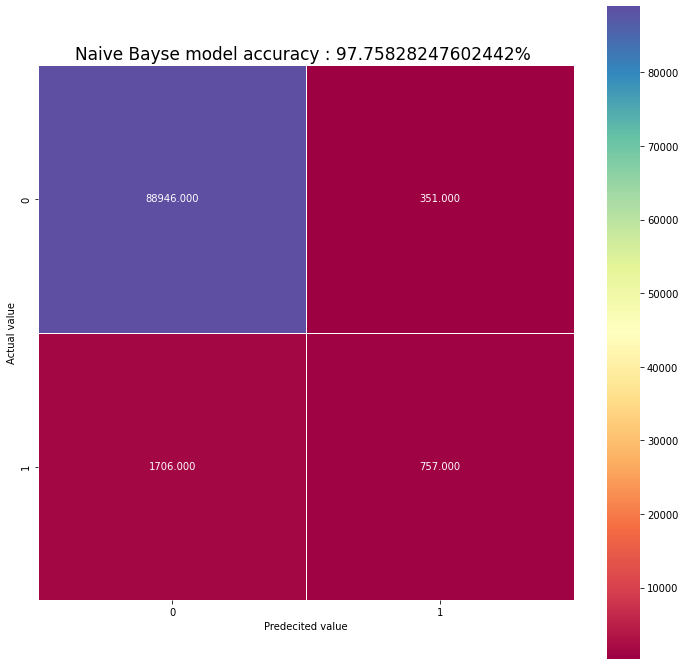

In [68]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm ,annot=True, fmt='.3f' , linewidths=.5 ,square=True , cmap='Spectral' )
plt.ylabel('Actual value')
plt.xlabel('Predecited value')
all_sample_title ='Naive Bayse model accuracy : {0}% '.format( nb_score * 100)
plt.title(all_sample_title, size  =17)

### how to read confusion matrix

True positive (88946) this result shows that actual value(no spammer ) and predicted value (no spammer)-----True prediction

True negative (757) this result shows that the actual value (spamer) and predicted value (spammer)-------True prediction

False positive (351) this result shows that the actual value (spammer) and predicted value (no spammer)----Type-1 error

False negative (1706) this result shows that the actual value (no spammer) and predicted value (spammer)----Type-2 error

### combine classification result

In [69]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',  
               'Naive Bayes', 
              'Decision Tree'],
    'Score': [svm_score , knn_score,  
             nb_score ,
              dt_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Naive Bayes,0.977583
3,Decision Tree,0.974466
0,Support Vector Machines,0.973158
1,KNN,0.972232


### this shows that all model predicted good result but ''Navie Bayes'' give best possible result

### prediction based on test data

In [70]:
test = pd.read_csv('../input/predict-potential-spammers-on-fiverr/test.csv')
test.head()


,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,57,19364,213,51,2,8,1,2,15,26,...,0,0,0,0,0,0,0,0,0,0
1,58,16000,212,13,3,11,1,2,15,26,...,0,0,0,0,0,0,0,0,0,0
2,59,14482,78,51,2,8,1,2,15,26,...,0,0,0,0,0,0,0,1,0,0
3,60,18074,175,51,2,8,1,2,15,26,...,0,1,0,0,0,0,0,1,0,0
4,61,4807,213,71,3,11,1,2,15,18,...,0,0,0,0,0,0,0,1,0,0


In [71]:
test=test.drop(columns=['user_id'])


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24148 entries, 0 to 24147
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      24148 non-null  int64
 1   X2      24148 non-null  int64
 2   X3      24148 non-null  int64
 3   X4      24148 non-null  int64
 4   X5      24148 non-null  int64
 5   X6      24148 non-null  int64
 6   X7      24148 non-null  int64
 7   X8      24148 non-null  int64
 8   X9      24148 non-null  int64
 9   X10     24148 non-null  int64
 10  X11     24148 non-null  int64
 11  X12     24148 non-null  int64
 12  X13     24148 non-null  int64
 13  X14     24148 non-null  int64
 14  X15     24148 non-null  int64
 15  X16     24148 non-null  int64
 16  X17     24148 non-null  int64
 17  X18     24148 non-null  int64
 18  X19     24148 non-null  int64
 19  X20     24148 non-null  int64
 20  X21     24148 non-null  int64
 21  X22     24148 non-null  int64
 22  X23     24148 non-null  int64
 23  X24     241

### missing value graph

<AxesSubplot:>

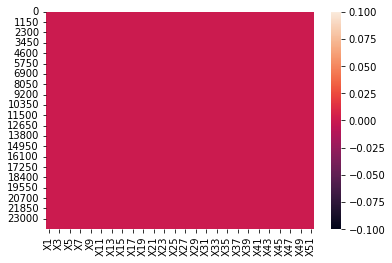

In [73]:
sns.heatmap(test.isnull())

In [74]:
test.drop(columns=['X27','X29', 'X30', 'X33', 'X46', 'X47', 'X48'], inplace=True)


### correlation heatmap 

1 shows the strong relationshiop

0 shows no relatopnship

-1 shows negative relationship

<AxesSubplot:>

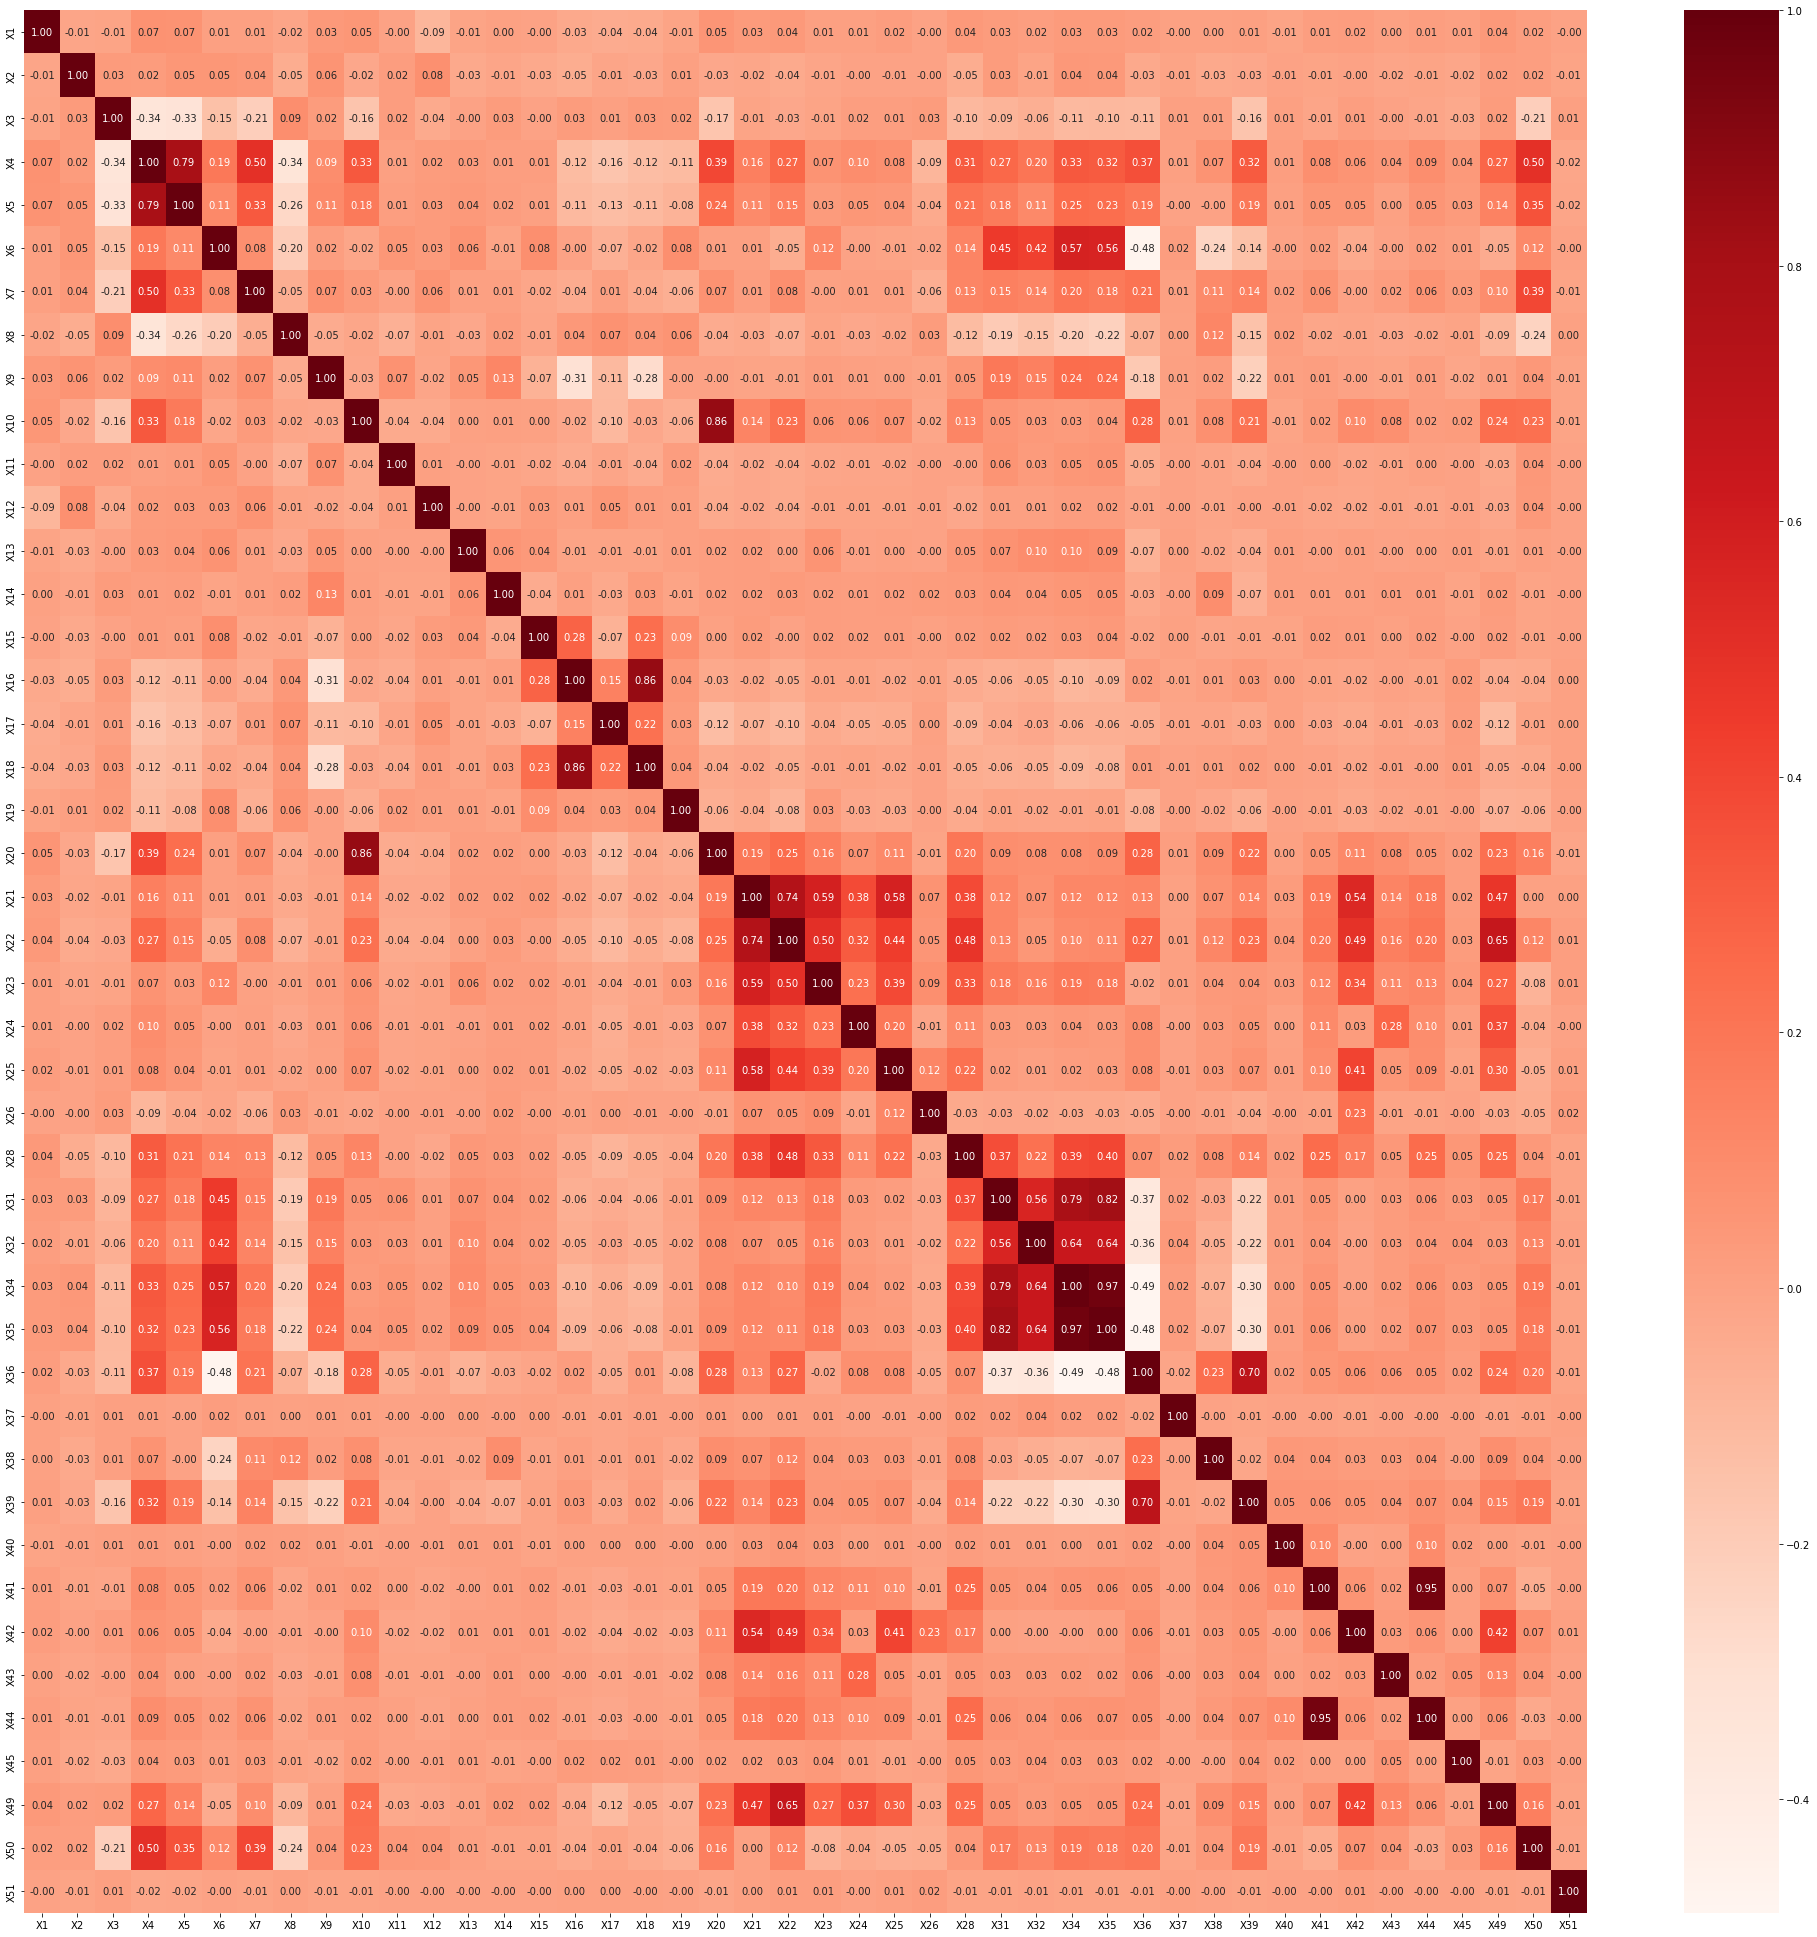

In [75]:
plt.figure(figsize=(35,35))
sns.heatmap(test.corr() , annot=True,cmap=plt.cm.Reds, fmt='.2f')

### prediction on "test" data set

In [76]:
y_pred = nb_model.predict(test)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [77]:
prediction = pd.DataFrame(y_pred,columns=['predicted_label'])
prediction.head()

,predicted_label
0,0
1,0
2,0
3,0
4,0


### Submission File

In [78]:
submission = pd.read_csv('../input/predict-potential-spammers-on-fiverr/sample_submission.csv')
submission.head()

,user_id,label
0,57,0
1,58,0
2,59,0
3,60,0
4,61,0


In [79]:
submission.shape

(24148, 2)

In [80]:
submission.head(10)


,user_id,label
0,57,0
1,58,0
2,59,0
3,60,0
4,61,0
5,114,0
6,172,0
7,173,1
8,174,0
9,175,1


In [81]:
submission['predicted_label']=prediction

In [82]:
submission.head(10)

,user_id,label,predicted_label
0,57,0,0
1,58,0,0
2,59,0,0
3,60,0,0
4,61,0,0
5,114,0,0
6,172,0,0
7,173,1,0
8,174,0,0
9,175,1,0


In [83]:
submission.columns = ['user_id','label','predicted_label']


## Prediction

In [84]:
submission

,user_id,label,predicted_label
0,57,0,0
1,58,0,0
2,59,0,0
3,60,0,0
4,61,0,0
...,...,...,...
24143,482942,0,0
24144,482943,0,0
24145,482944,0,0
24146,482945,0,0


In [85]:
submission.to_csv('submission.csv', index=False)